In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import numpy as np

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT','DIS']

# Define which online source one should use
data_source = 'yahoo'

start_date = '2010-01-01'
end_date = '2011-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [3]:
n = len(tickers)
print n

30


In [4]:
del panel_data['Open']
del panel_data['Close']
del panel_data['High']
del panel_data['Low']

panel_data = panel_data[:,::-1,:]

In [5]:
logProf = [[round(math.log(panel_data[0,i,j] / panel_data[0,i-1,j]), 4) for i in range(1,len(panel_data[0,:,j]))] for j in range(n)]
logProfDF = pd.DataFrame(data=logProf, index= tickers, columns= [(panel_data.axes[1][i].to_datetime().date()) for i in reversed(range(1,len(panel_data.axes[1])))])
logProfDF

,2011-12-30,2011-12-29,2011-12-28,2011-12-27,2011-12-23,2011-12-22,2011-12-21,2011-12-20,2011-12-19,2011-12-16,...,2010-01-15,2010-01-14,2010-01-13,2010-01-12,2010-01-11,2010-01-08,2010-01-07,2010-01-06,2010-01-05,2010-01-04
MMM,0.0154,0.0017,-0.0160,-0.0019,0.0066,-0.0089,-0.0114,0.0140,-0.0058,-0.0169,...,0.0055,0.0031,0.0353,0.0013,0.0053,0.0119,0.0079,-0.0096,0.0061,-0.0003
AXP,0.0098,-0.0022,0.0160,0.0161,-0.0007,-0.0115,0.0132,0.0031,0.0125,-0.0068,...,0.0099,-0.0181,0.0400,-0.0090,0.0029,0.0067,-0.0061,-0.0146,0.0116,-0.0074
AAPL,0.0372,0.0322,0.0299,0.0397,-0.0097,-0.0119,-0.0073,0.0120,0.0065,-0.0121,...,0.0056,-0.0120,0.0320,0.0158,0.0095,-0.0043,0.0040,-0.0137,0.0115,-0.0103
BA,0.0270,0.0119,0.0030,0.0040,0.0112,0.0609,-0.0299,0.0014,-0.0056,-0.0237,...,-0.0057,0.0006,0.0501,-0.0011,0.0020,0.0048,-0.0076,-0.0241,0.0134,0.0002
CAT,0.0308,-0.0045,-0.0065,0.0045,0.0053,-0.0028,-0.0160,0.0180,0.0125,-0.0223,...,-0.0056,-0.0140,0.0399,-0.0270,0.0117,0.0186,0.0059,-0.0229,0.0049,-0.0094
CVX,0.0265,0.0071,0.0001,-0.0038,0.0018,0.0176,-0.0058,-0.0076,-0.0031,-0.0040,...,0.0119,-0.0114,0.0388,0.0168,0.0083,0.0111,0.0045,-0.0189,0.0141,-0.0100
CSCO,-0.0056,-0.0025,-0.0053,0.0003,0.0016,-0.0164,-0.0174,0.0151,-0.0087,-0.0136,...,0.0037,-0.0163,0.0401,0.0028,0.0186,0.0201,-0.0024,-0.0099,0.0125,-0.0056
KO,0.0546,0.0436,0.0176,0.0006,0.0035,-0.0126,0.0032,-0.0036,-0.0072,-0.0178,...,0.0215,-0.0238,0.0463,0.0118,0.0282,0.0274,0.0000,-0.0235,0.0197,0.0010
DWDP,0.0209,0.0052,-0.0052,0.0505,0.0213,0.0096,0.0006,0.0036,-0.0078,-0.0157,...,0.0130,-0.0089,0.0246,0.0234,0.0298,0.0099,-0.0121,-0.0100,0.0134,-0.0089
XOM,0.0248,0.0175,-0.0107,0.0194,-0.0191,-0.0159,-0.0220,0.0074,-0.0032,-0.0199,...,-0.0198,-0.0270,0.0367,0.0111,0.0260,-0.0067,-0.0204,-0.0196,0.0098,-0.0064


In [6]:
def E(logProf):
    return [sum(compProf)/len(compProf) for compProf in logProf]

def Ep(X, logProf):
    return sum(E(logProf)*X)

In [7]:
def C(logProf):
    return np.cov(logProf)

def o2(X,logProf):
    c = C(logProf)

    answ = 0

    for i in range(n):
        for j in range(n):
            answ  += X[i]*X[j]*c[i,j]
    return answ

In [39]:
# решение задачи минимизации риска при заданнной доходности, короткие продажи разрешены
import scipy
from scipy.optimize import minimize, rosen, rosen_der

xs = []
ys = []
for e in np.arange(0.00, 0.006, 0.0001):

    #b = [(-1,1) for i in range(n)]
    b = [(0,1) for i in range(n)]
    cons = ({'type': 'eq', 'fun': lambda X: sum(X) - 1},
            {'type': 'eq', 'fun': lambda X: Ep(X, logProf) - e})
    res = scipy.optimize.minimize(fun=o2, x0=np.zeros(n), args=logProf, bounds=b, constraints=cons)
    if (sum(res.x) == 0): break
    xs.append( o2(X=res.x, logProf=logProf) )
    ys.append( Ep(X=res.x, logProf=logProf) )

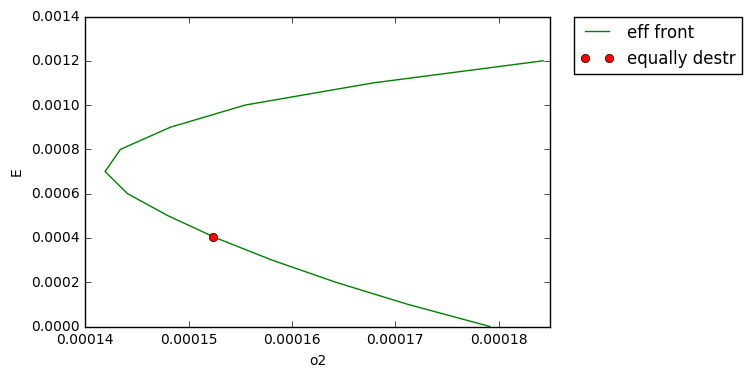

In [40]:
plt.plot(xs, ys, '-g', label='eff front')
plt.xlabel("o2")
plt.ylabel("E")

X = np.zeros(n)
for i in range(n):
    X[i] = 1.0/n
plt.plot(o2(X,logProf), Ep(X,logProf), 'ro', label='equally destr')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [41]:
# решение задачи минимизации риска при заданнной доходности, короткие продажи запрещены
import scipy
from scipy.optimize import minimize, rosen, rosen_der

xs = []
ys = []
for e in np.arange(0.000, 0.006, 0.0001):

    b = [(0,1) for i in range(n)]
    cons = ({'type': 'eq', 'fun': lambda X: sum(X) - 1},
            {'type': 'eq', 'fun': lambda X: Ep(X, logProf) - e})
    res = scipy.optimize.minimize(fun=o2, x0=np.zeros(n), args=logProf, bounds=b, constraints=cons)
    if (sum(res.x) == 0): break
    xs.append( o2(X=res.x, logProf=logProf) )
    ys.append( Ep(X=res.x, logProf=logProf) )

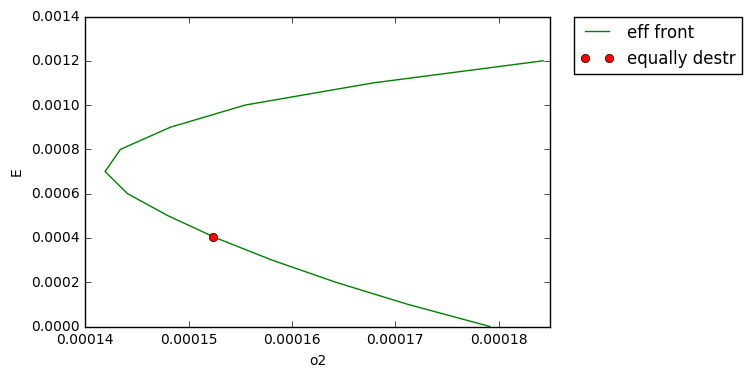

In [42]:
plt.plot(xs, ys, '-g', label='eff front')
plt.xlabel("o2")
plt.ylabel("E")


X = np.zeros(n)
for i in range(n):
    X[i] = 1.0/n
plt.plot(o2(X,logProf), Ep(X,logProf), 'ro', label='equally destr')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

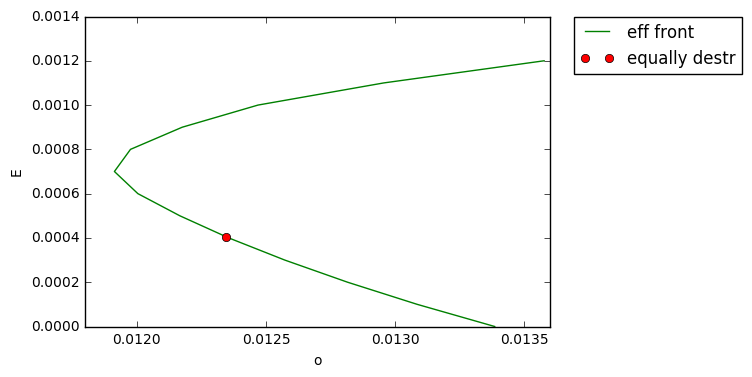

In [43]:
plt.plot([math.sqrt(xs[i]) for i in range(len(xs))], ys, '-g', label='eff front')
plt.xlabel("o")
plt.ylabel("E")


X = np.zeros(n)
for i in range(n):
    X[i] = 1.0/n
plt.plot(math.sqrt(o2(X,logProf)), Ep(X,logProf), 'ro', label='equally destr')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

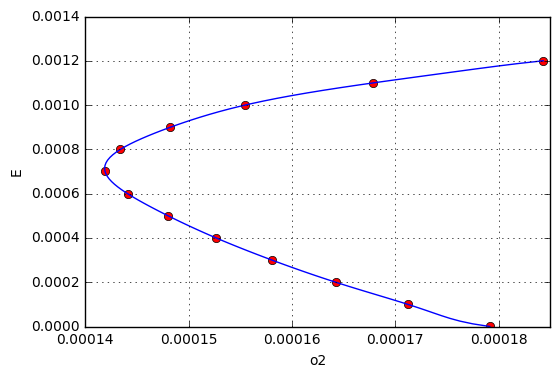

In [44]:
import numpy as np
import matplotlib.pyplot as plt


def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z



x=ys
y=xs

xnew=np.linspace(np.min(x),np.max(x),100)
ynew=[lagranz(x,y,i) for i in xnew]
plt.plot(y,x,'or',ynew,xnew)
plt.grid(True)
plt.xlabel("o2")
plt.ylabel("E")
plt.show()

f(t) = lagranz(x,y,t) - аппроксимация точек интерполяционным многочленом лагранжа